### Calculando a Taxa de Retorno dos Indices

In [2]:
# Importando as bibliotecas necessarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [29]:
# Obtendo os dados dos Indices:
tickers = ['^GSPC', '^IXIC', '^GDAXI']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']
    
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


<AxesSubplot:xlabel='Date'>

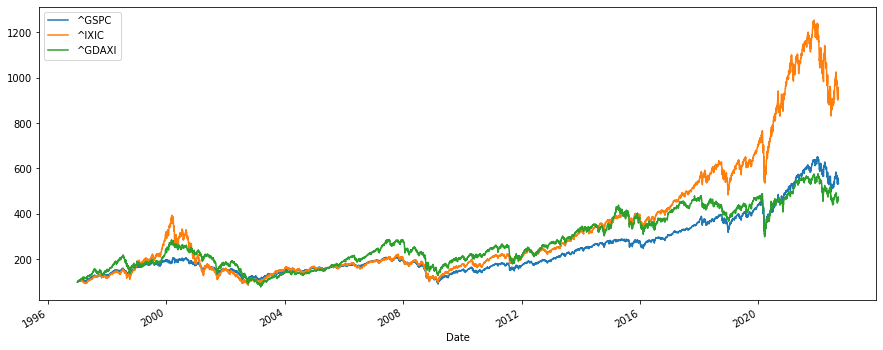

In [30]:
# Normalizando os dados na base 100:
normalizados = ind_data / ind_data.iloc[0] * 100

# Gerando um gráfico
normalizados.plot(figsize=(15,6))

In [31]:
# Retorno diario:
ind_returns = (ind_data / ind_data.shift(1)) -1
ind_returns

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049
1997-01-06,-0.000508,0.004364,0.009409
1997-01-07,0.007463,0.008607,-0.004795
1997-01-08,-0.006399,-0.005558,0.009644
...,...,...,...
2022-09-08,0.006611,0.005956,-0.000902
2022-09-09,0.015271,0.021091,0.014250
2022-09-12,0.010584,0.012723,0.023996


In [32]:
# Retorno Medio Anual:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.084000
^IXIC     0.117141
^GDAXI    0.071835
dtype: float64

#### Comparando Ações com Indices de Mercado

In [37]:
# Obtendo os dados:
# Ação - PG
# Indices - GSPC e DJI

tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for i in tickers:
    data_2[i] = wb.DataReader(i, data_source='yahoo', start='2012-1-1')['Adj Close']
    
data_2.tail(10)

,PG,^GSPC,^DJI
Date,,,
2022-08-31,137.940002,3955.000000,31510.429688
2022-09-01,139.639999,3966.850098,31656.419922
2022-09-02,137.160004,3924.260010,31318.439453
2022-09-06,135.630005,3908.189941,31145.300781
2022-09-07,137.679993,3979.870117,31581.279297
2022-09-08,137.860001,4006.179932,31774.519531
2022-09-09,139.960007,4067.360107,32151.710938
2022-09-12,141.100006,4110.410156,32381.339844
2022-09-13,138.179993,3932.689941,31104.970703


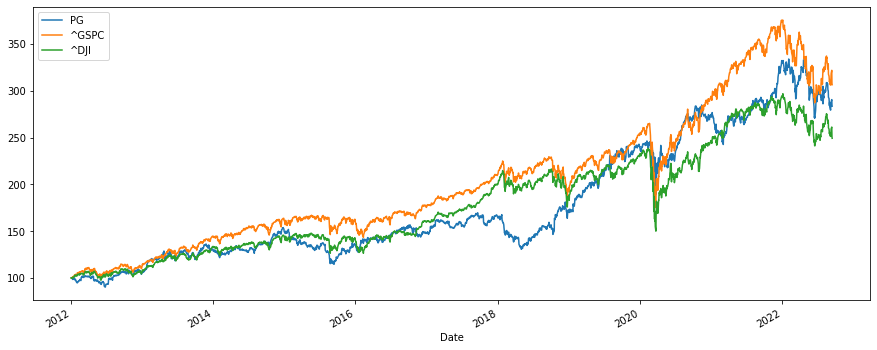

In [38]:
# Normalizando os dados:
norm_2 = data_2 / data_2.iloc[0] * 100

# Plotando o Grafico:
norm_2.plot(figsize=(15,6))
plt.show()

In [39]:
# Retornos Diários
returns = (data_2 / data_2.shift(1)) - 1
returns.tail()

,PG,^GSPC,^DJI
Date,,,
2022-09-08,0.001307,0.006611,0.006119
2022-09-09,0.015233,0.015271,0.011871
2022-09-12,0.008145,0.010584,0.007142
2022-09-13,-0.020695,-0.043237,-0.039417
2022-09-14,-0.003582,-0.004661,-0.006712


In [40]:
# Retornos Medios Anuais:
annual_returns = returns.mean() * 250
annual_returns

PG       0.112712
^GSPC    0.118389
^DJI     0.099035
dtype: float64

In [51]:
# Comparando Retornos Anuais:
print(f'PG x NASDAQ: {annual_returns[0] / annual_returns[1]:.2f}\nPG x Dow Jones: {annual_returns[0] / annual_returns[2]:.2f}')

PG x NASDAQ: 0.95
PG x Dow Jones: 1.14
